## MATH285 Lab Code
**Group Name:** MATH285gg  

**Group Member and student ID:**  
Jun Liang     3210112584  
Yujie Pan     3210112494  
Xinchen Yin   3210112483  
Ziming Yan    3210111502  
Xingjian Kang 3210110763  

In [3]:
import math
from matplotlib import pyplot as plt

In [17]:
def func(t, y):
    return (y - t ** 2) * (y ** 2 - t)
    # return y             # for test
    # return math.cos(t)   # for test

In [5]:
class NumericalSols:
    def __init__(self, y_0, step, lower_bound, upper_bound, method_num):
        self.t_0 = 0
        self.y_0 = y_0
        assert(lower_bound <= 0 and upper_bound >= 0)
        self.lower_bound = lower_bound
        self.upper_bound = upper_bound
        self.step = step
        self.t_all = []
        self.y_all = []
        self.method_num = method_num
        if method_num == 0:
            self.eulerMethod()
        elif method_num == 1:
            self.impEuler()
        elif method_num == 2:
            self.runge4thMethod()
        elif method_num == 3:
            self.linearMulStep()
        elif method_num == 4:
            self.powerSeries()
        else:
            raise NotImplementedError

    # method_num: 0
    def eulerMethod(self):
        # less than 0
        i = 1
        y_n = t_n = 0
        while t_n >= self.lower_bound:
            if i == 1:
                i = 0
                y_n = self.y_0
                t_n = self.t_0
            self.y_all.insert(0, y_n)
            self.t_all.insert(0, t_n)
            y_n = y_n + func(t_n, y_n) * (-self.step)
            t_n = t_n + (-self.step)
        
        # larger than 0   
        i = 1
        y_n = t_n = 0
        while t_n <= self.upper_bound:
            if i == 1:
                i = 0
                y_n = self.y_0
                t_n = self.t_0
            self.y_all.append(y_n)
            self.t_all.append(t_n)

            y_n = y_n + func(t_n, y_n) * self.step
            t_n = t_n + self.step

    # 1
    def impEuler(self):
        i = 1
        y_n = t_n = 0
        while t_n >= self.lower_bound:
            if i == 1:
                i = 0
                y_n = self.y_0
                t_n = self.t_0
            self.y_all.insert(0, y_n)
            self.t_all.insert(0, t_n)
            y_n_euler = y_n + func(t_n, y_n) * (-self.step)    # improved from Euler Method
            y_n = y_n + 0.5 * (-self.step) * (func(t_n, y_n) + func(t_n + (-self.step), y_n_euler))
            t_n = t_n + (-self.step)
        
        i = 1
        y_n = t_n = 0
        while t_n <= self.upper_bound:
            if i == 1:
                i = 0
                y_n = self.y_0
                t_n = self.t_0
            self.y_all.append(y_n)
            self.t_all.append(t_n)

            y_n_euler = y_n + func(t_n, y_n) * self.step    # improved from Euler Method
            y_n = y_n + 0.5 * self.step * (func(t_n, y_n) + func(t_n + self.step, y_n_euler))
            t_n = t_n + self.step
    
    # 2
    def runge4thMethod(self):
        i = 1
        y_n = t_n = 0
        while t_n >= self.lower_bound:
            if i == 1:
                i = 0
                y_n = self.y_0
                t_n = self.t_0
            self.y_all.insert(0, y_n)
            self.t_all.insert(0, t_n)
            k1 = self.step * func(y_n, t_n)
            k2 = self.step * func(y_n + 0.5 * k1, t_n + 0.5 * self.step)
            k3 = self.step * func(y_n + 0.5 * k2, t_n + 0.5 * self.step)
            k4 = self.step * func(y_n + k3, t_n + self.step)
            y_n = y_n - (k1 + 2 * k2 + 2 * k3 + k4) / 6.0
            t_n = t_n + (-self.step)
        
        i = 1
        y_n = t_n = 0
        while t_n <= self.upper_bound:
            if i == 1:
                i = 0
                y_n = self.y_0
                t_n = self.t_0
            self.y_all.append(y_n)
            self.t_all.append(t_n)

            k1 = self.step * func(y_n, t_n)
            k2 = self.step * func(y_n + 0.5 * k1, t_n + 0.5 * self.step)
            k3 = self.step * func(y_n + 0.5 * k2, t_n + 0.5 * self.step)
            k4 = self.step * func(y_n + k3, t_n + self.step)
            y_n = y_n + (k1 + 2 * k2 + 2 * k3 + k4) / 6.0
            t_n = t_n + self.step
    
    # 3
    def linearMulStep(self):
        pass
    
    # 4 
    def powerSeries(self):
        pass
        # negative t
        i = 1
        y_n = t_n = 0
        while t_n >= self.lower_bound:
            if i == 1:
                i = 0
                y_n = self.y_0
                t_n = self.t_0
            self.y_all.insert(0, y_n)
            self.t_all.insert(0, t_n)

            #y_n = y_n + func(t_n, y_n) * (-self.step)
            
            t_n = t_n - self.step
        
        # positive t
        i = 1
        y_n = t_n = 0
        while t_n <= self.upper_bound:
            if i == 1:
                i = 0
                y_n = self.y_0
                t_n = self.t_0
            self.y_all.append(y_n)
            self.t_all.append(t_n)

            #y_n = y_n + func(t_n, y_n) * self.step

            t_n = t_n + self.step

    
    
    def draw(self):
        plt.xlabel('t', fontsize=19)
        plt.ylabel('y', fontsize=19)
        plt.plot(self.t_all, self.y_all, c="red")


In [6]:
def testDiffMethods(y_0, step, lower_bound, upper_bound):
    """
    Test different methods according to the given parameters by drawing plots.
    """
    # eulerMethod
    euler_meth = NumericalSols(y_0, step, lower_bound, upper_bound, 0)
    plt.plot(euler_meth.t_all, euler_meth.y_all, c="green", label="Euler method")
    
    # impEuler
    im_eu_meth = NumericalSols(y_0, step, lower_bound, upper_bound, 1)
    plt.plot(im_eu_meth.t_all, im_eu_meth.y_all, c="red", label="Improve Euler method")
    
    # runge4thMethod
    runge_meth = NumericalSols(y_0, step, lower_bound, upper_bound, 2)
    plt.plot(runge_meth.t_all, runge_meth.y_all, c="blue", label="Runge 4th order")
    
    # linearMulStep
    mulstep_meth = NumericalSols(y_0, step, lower_bound, upper_bound, 3)
    plt.plot(mulstep_meth.t_all, mulstep_meth.y_all, c="black", label="Linear MultiStep")
    
    # powerSeries method
    power_meth = NumericalSols(y_0, step, lower_bound, upper_bound, 4)
    plt.plot(power_meth.t_all, power_meth.y_all, c="orange", label="Power series")
    

In [7]:
def testDiffSteps(y_0, lower_bound, upper_bound, method_num):
    """
    Test one method with different steps by drawing plots.
    """
    # step == 0.2
    meth1 = NumericalSols(y_0, 0.2, lower_bound, upper_bound, method_num)
    plt.plot(meth1.t_all, meth1.y_all, c="green", label="step=0.2")
    
    # step == 0.1
    meth2 = NumericalSols(y_0, 0.1, lower_bound, upper_bound, method_num)
    plt.plot(meth2.t_all, meth2.y_all, c="red", label="step=0.1")
    
    # step == 0.05
    meth3 = NumericalSols(y_0, 0.05, lower_bound, upper_bound, method_num)
    plt.plot(meth3.t_all, meth3.y_all, c="blue", label="step=0.05")
    

In [8]:
def plotDiffMethods(y_0, step, lower_bound, upper_bound):
    # fig=plt.figure(num=1,figsize=(8,6))
    plt.xlabel('t', fontsize=19)
    plt.ylabel('y', fontsize=19)

    # ax1 = fig.add_subplot(311)
    # ax1.set_title("311")
    testDiffMethods(y_0, step, lower_bound, upper_bound)

    plt.legend()
    plt.show()

In [9]:
def plotDiffSteps(y_0, lower_bound, upper_bound, method_num):
    plt.xlabel('t', fontsize=19)
    plt.ylabel('y', fontsize=19)

    testDiffSteps(y_0, lower_bound, upper_bound, method_num)

    plt.legend()
    plt.show()  
    pass

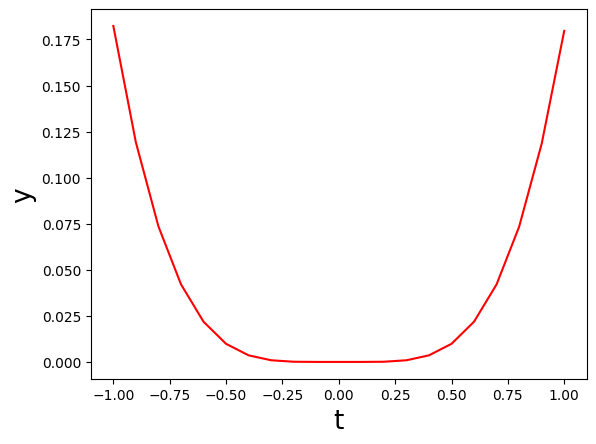

In [10]:
# Euler Method with step = 0.1, IVP1
euler_1 = NumericalSols(0, 0.1, -1, 1, 0)
euler_1.draw()

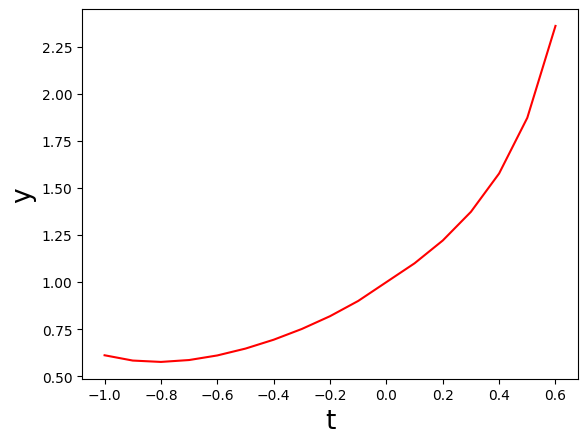

In [11]:
# Euler Method with step = 0.1, IVP2
euler_2 = NumericalSols(1, 0.1, -1, 0.6, 0)
euler_2.draw()

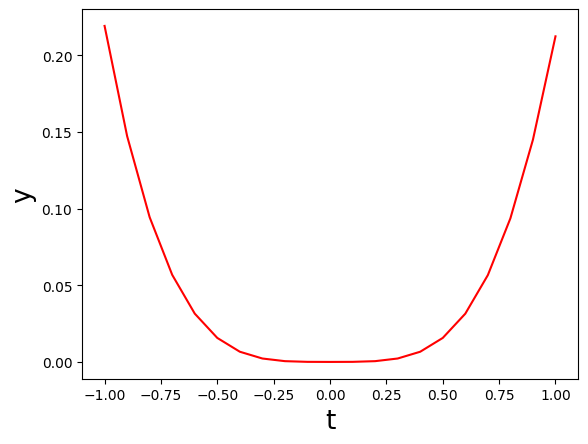

In [12]:
# improve Euler Method with step = 0.1, IVP1
plt.xlabel('t', fontsize=19)
plt.ylabel('y', fontsize=19)
im_euler_1 = NumericalSols(0, 0.1, -1, 1, 1)
im_euler_1.draw()

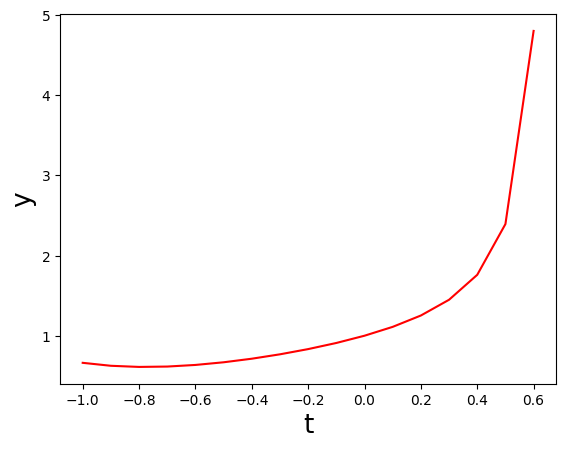

In [13]:
# improve Euler Method with step = 0.1, IVP2
plt.xlabel('t', fontsize=19)
plt.ylabel('y', fontsize=19)
im_euler_2 = NumericalSols(1, 0.1, -1, 0.6, 1)
im_euler_2.draw()

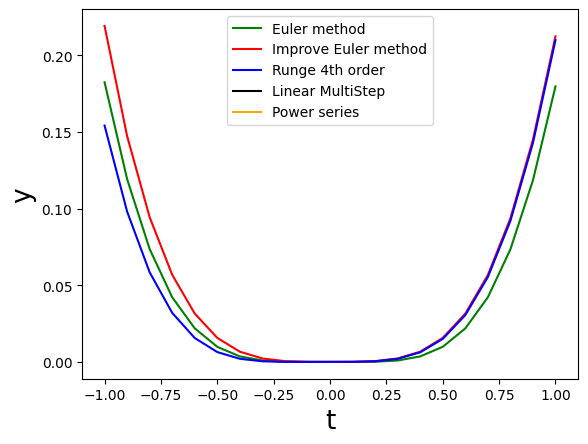

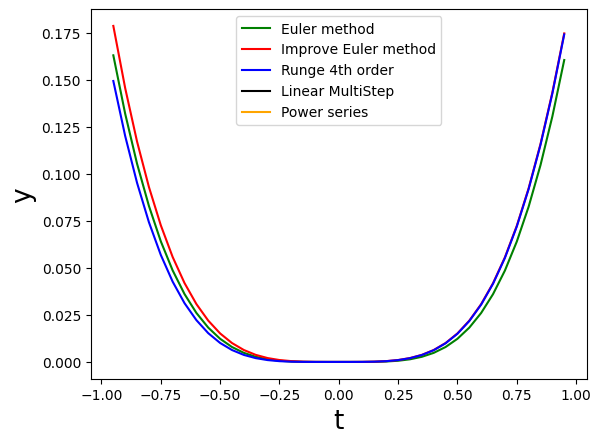

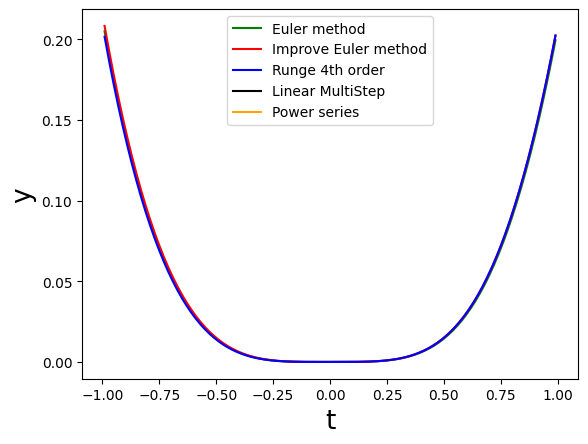

In [14]:
# IVP1, compare methods with different steps
plotDiffMethods(0, 0.1, -1, 1)  # step == 0.1
plotDiffMethods(0, 0.05, -1, 1) # step == 0.05
plotDiffMethods(0, 0.01, -1, 1) # step == 0.01

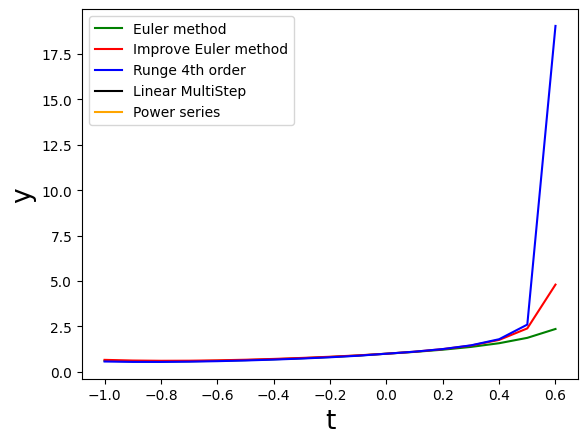

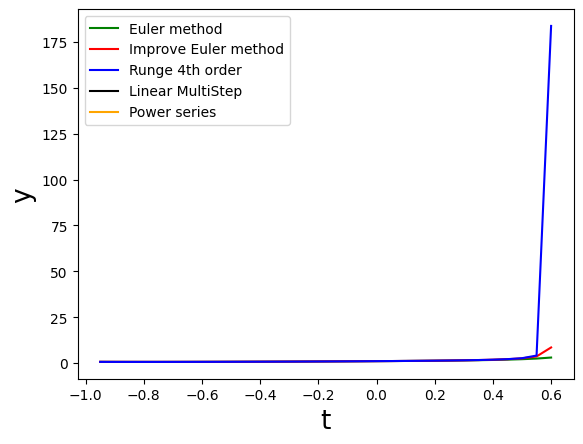

OverflowError: (34, 'Result too large')

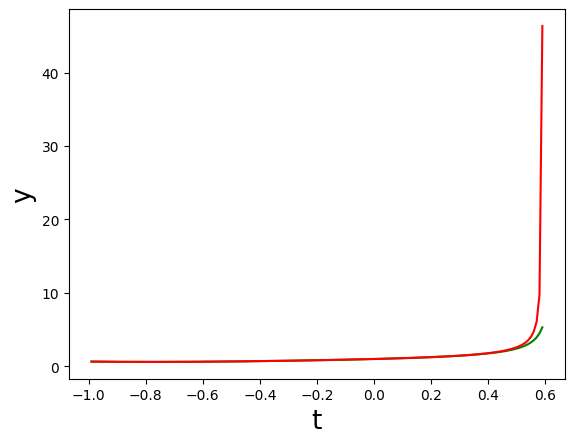

In [16]:
# IVP2, compare methods with different steps
plotDiffMethods(1, 0.1, -1, 0.6)  # step == 0.1
plotDiffMethods(1, 0.05, -1, 0.6) # step == 0.05
plotDiffMethods(1, 0.01, -1, 0.6) # step == 0.01

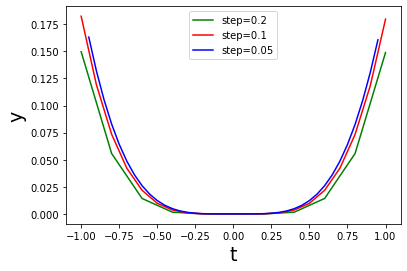

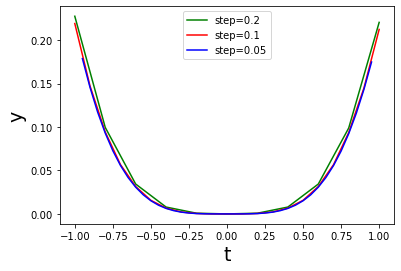

In [ ]:
# IVP1, compare one method with different steps
plotDiffSteps(0, -1, 1, 0) # Euler
plotDiffSteps(0, -1, 1, 1) # improve Euler
                           # others

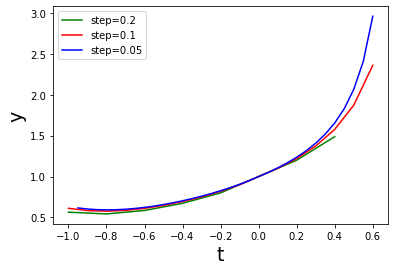

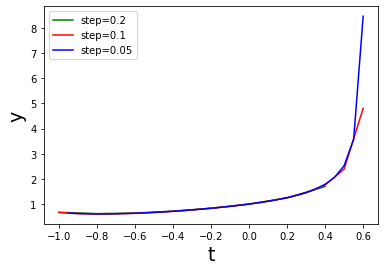

In [ ]:
# IVP2, compare one method with different steps
plotDiffSteps(1, -1, 0.6, 0) # Euler
plotDiffSteps(1, -1, 0.6, 1) # improve Euler
                             # others